In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
from  matplotlib.pyplot import figure  

In [3]:
plt.style.use("seaborn")

C:\Users\osama\AppData\Local\Temp\ipykernel_17996\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [4]:
data  = pd.read_csv("FreeCodeCamp.csv") 
datagroupby = data
data.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [5]:
data['date'] = pd.to_datetime(data['date'] , format = '%Y-%m-%d' )

In [6]:
data['Year'] = data['date'].dt.year
data['Month']  =data['date'].dt.month
data['day'] =data['date'].dt.day

In [7]:
data['NameMonth'] = data['Month'].replace(np.arange(1,13).tolist() , ['January', 'February', 'March', 'April', 'May', 'June', 'July',  'August', 'September', 'October', 'November', 'December']  ) 

In [8]:
data 

,date,value,Year,Month,day,NameMonth
0,2016-05-09,1201,2016,5,9,May
1,2016-05-10,2329,2016,5,10,May
2,2016-05-11,1716,2016,5,11,May
3,2016-05-12,10539,2016,5,12,May
4,2016-05-13,6933,2016,5,13,May
...,...,...,...,...,...,...
1299,2019-11-29,171584,2019,11,29,November
1300,2019-11-30,141161,2019,11,30,November
1301,2019-12-01,142918,2019,12,1,December
1302,2019-12-02,220144,2019,12,2,December


In [9]:
data = data[
    (data["value"] >= data["value"].quantile(0.025))
    & (data["value"] <= data["value"].quantile(0.975))
]

In [10]:
len(data)

1238

In [11]:
datagroupby = data 

Text(0, 0.5, 'PageViews')

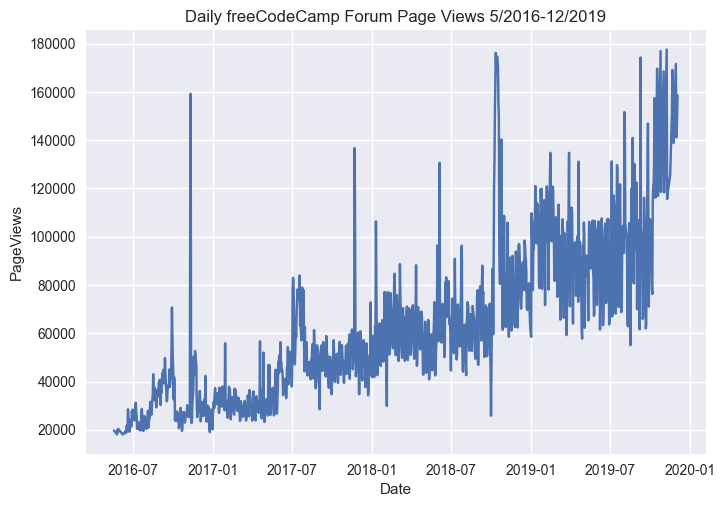

In [12]:
plt.plot(data['date'] , data['value']) 
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019') 
plt.xlabel("Date") 
plt.ylabel("PageViews") 


In [13]:
gk = datagroupby.groupby('Month')

In [14]:
gk.first()

,date,value,Year,day,NameMonth
Month,,,,,
1,2017-01-01,26185,2017,1,January
2,2017-02-01,30124,2017,1,February
3,2017-03-01,33258,2017,1,March
4,2017-04-01,23762,2017,1,April
5,2016-05-19,19736,2016,19,May
6,2016-06-07,18335,2016,7,June
7,2016-07-01,28372,2016,1,July
8,2016-08-01,20947,2016,1,August
9,2016-09-01,40709,2016,1,September


In [15]:
gk

In [16]:
def Draw_bar_plot():
    g= sns.catplot( kind = 'bar' , x = 'Year' , y = "value" , data = data , hue = "NameMonth"  , hue_order= ['January', 'February', 'March', 'April', 'May', 'June', 'July',  'August', 'September', 'October', 'November', 'December'] ,legend_out = False )
    g.set(title = "Average Page Views.", xlabel  = "Year" , ylabel = " Average Page Views." )    
    plt.title('Months')

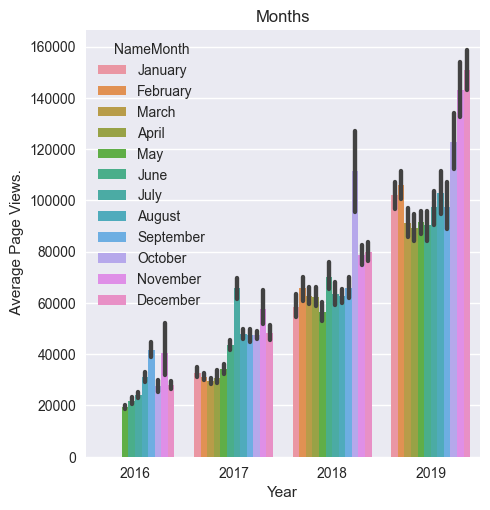

In [17]:
Draw_bar_plot()

In [18]:
def Draw_box_plot_Year():
    sns.boxplot(x = 'Year', y = 'value', data =data, palette = 'tab10').set(
    title = 'Year-wise Box Plot (Trend)',  xlabel='Year',  ylabel='Page Views') 


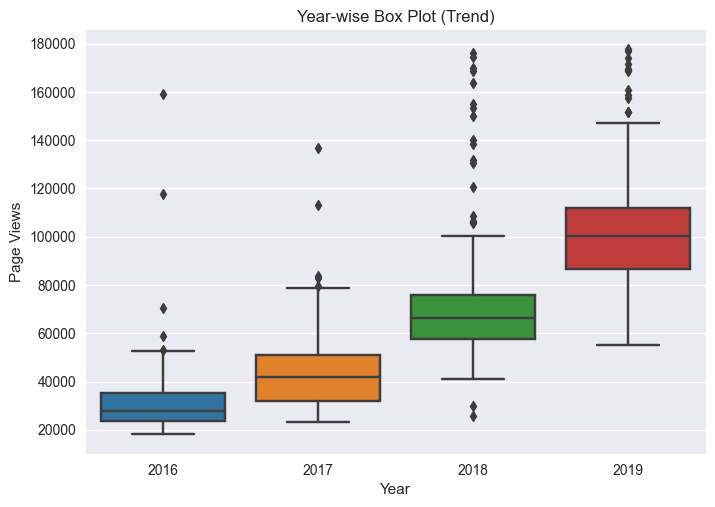

In [19]:
Draw_box_plot_Year()

In [20]:
def Draw_box_plot_Month():
     sns.boxplot(x = 'value', y = 'NameMonth', data =data, palette = 'tab10').set(
    title = 'Month-wise Box Plot (Seasonality)',  xlabel='Average Page Views.',  ylabel='Months') 

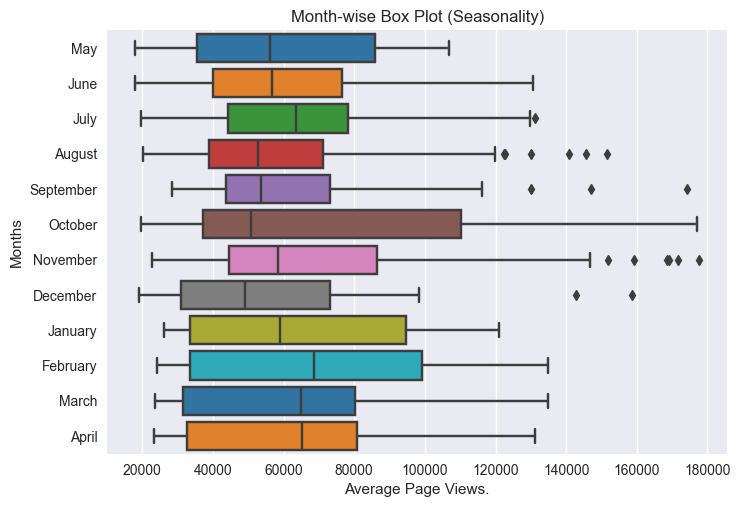

In [21]:
Draw_box_plot_Month()